In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils

plt.rcParams.update({"font.size": 9})

# preprocess dataframe
df196 = (
    utils.mat_to_pd("datasets/Rat196Vectors_241025.mat")
    .query("Valid == 1 and RT == RT")
    .assign(trialDate=lambda x: pd.to_datetime(x["trialDate"] - 719529, unit="D"))
    .set_index("trialDate")
    .sort_index()
    .assign(
        RT=lambda x: x["RT"] - x["RT"].min() + 1e-2,
        y=lambda x: x["RT"] * x["correct"].map({1: 1, 0: -1}),
        coh_bins=lambda x: pd.cut(x["coherence"], bins=5),
        day=lambda x: ((x.index - pd.Timedelta(hours=14)).floor("D") + pd.Timedelta(hours=14)),  # 2pm - 2pm
        hour=lambda x: x.index.hour + 1,
        minute5=lambda x: (x.index.hour * 12 + x.index.minute // 5),
    )
)

a_lim, beta_v_lim = [0.62, 1.66], [-0.14, 3.48]  # set limits across panels

df196.shape

(132743, 21)

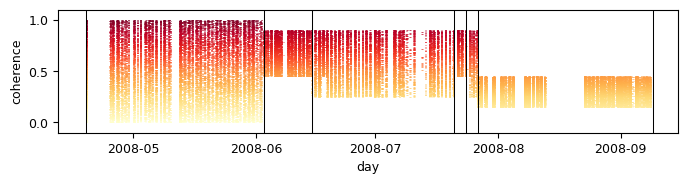

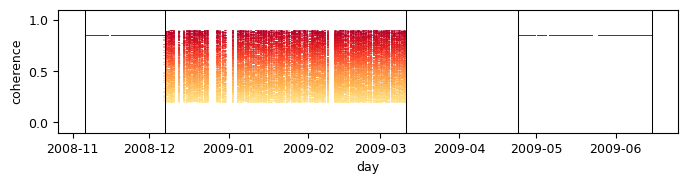

In [2]:
# coherence, 24H sessions
vlines = ["2008-04-19", "2008-06-03", "2008-06-15", "2008-07-21", "2008-07-24", "2008-07-27", "2008-09-09"]
utils.plot_coherence(df196.loc[:"2008-10"], vlines)

# coherence, 2H sessions
vlines = ["2008-11-06", "2008-12-07", "2009-03-11", "2009-04-24", "2009-06-15"]
utils.plot_coherence(df196.loc["2008-10":], vlines)

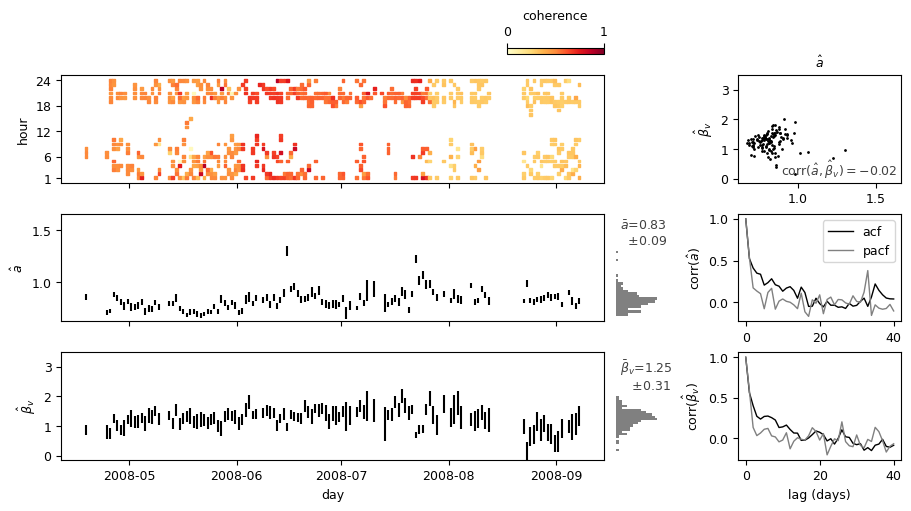

In [3]:
# fit by day, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc[:"2008-10"], "day")
utils.plot_heatmap_and_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", a_lim=a_lim, beta_v_lim=beta_v_lim)

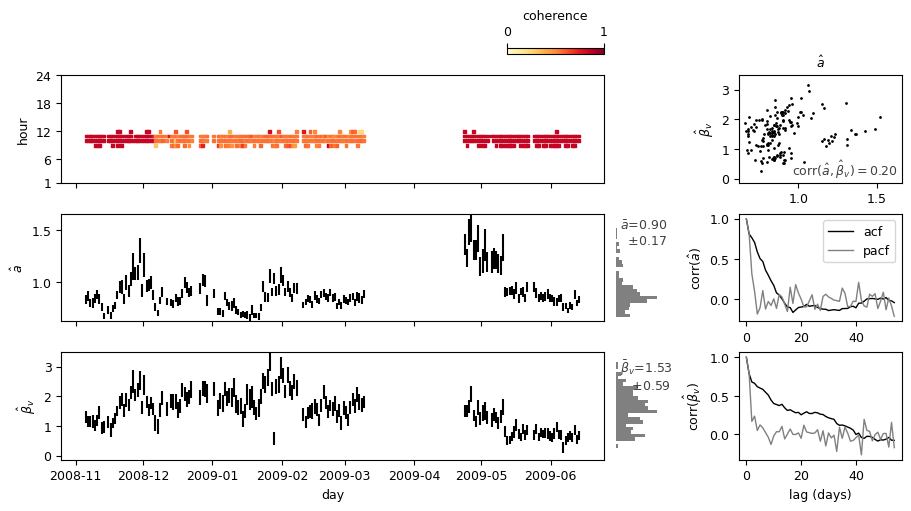

In [4]:
# fit by day, 2H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc["2008-10":], "day")
utils.plot_heatmap_and_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", a_lim=a_lim, beta_v_lim=beta_v_lim)

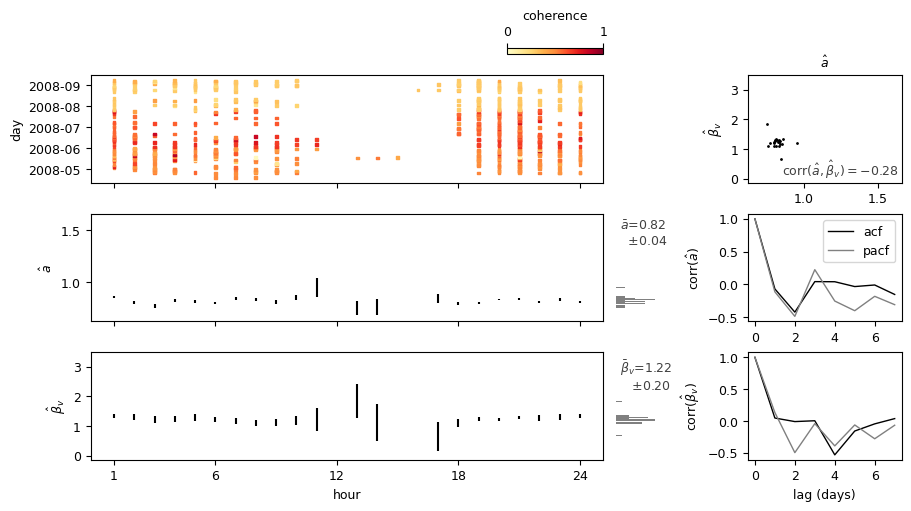

In [5]:
# fit by hour, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_hour = utils.fit_ddm(df196.loc[:"2008-10"], "hour")
utils.plot_heatmap_and_fits(df196_heatmap, df196_fit_by_hour, x="hour", y="day", a_lim=a_lim, beta_v_lim=beta_v_lim)

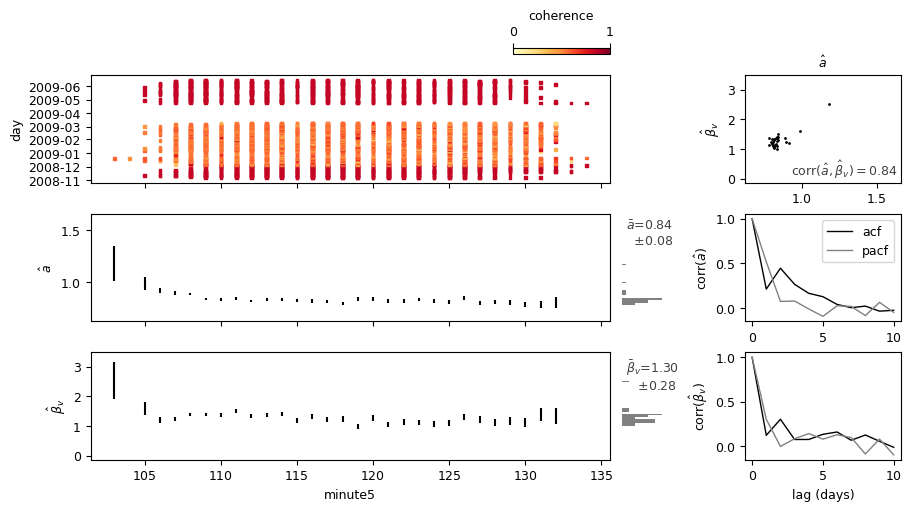

In [6]:
# fit by 5-minute, 2H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["day", "minute5"], as_index=False)["coherence"].mean()
df196_fit_by_minute = utils.fit_ddm(df196.loc["2008-10":], "minute5")
utils.plot_heatmap_and_fits(
    df196_heatmap, df196_fit_by_minute, x="minute5", y="day", a_lim=a_lim, beta_v_lim=beta_v_lim
)